Given strings s1, s2, and s3, find whether s3 is formed by an interleaving of s1 and s2.

An interleaving of two strings s and t is a configuration where they are divided into non-empty substrings such that:

    s = s1 + s2 + ... + sn
    t = t1 + t2 + ... + tm
    |n - m| <= 1
    The interleaving is s1 + t1 + s2 + t2 + s3 + t3 + ... or t1 + s1 + t2 + s2 + t3 + s3 + ...

Note: a + b is the concatenation of strings a and b.

Example 1:

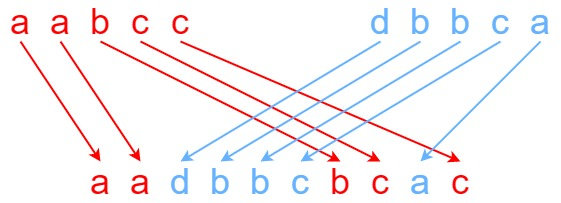

Input: s1 = "aabcc", s2 = "dbbca", s3 = "aadbbcbcac"
Output: true

Example 2:

Input: s1 = "aabcc", s2 = "dbbca", s3 = "aadbbbaccc"
Output: false

Example 3:

Input: s1 = "", s2 = "", s3 = ""
Output: true

 

Constraints:

    0 <= s1.length, s2.length <= 100
    0 <= s3.length <= 200
    s1, s2, and s3 consist of lowercase English letters.

 

Follow up: Could you solve it using only O(s2.length) additional memory space?


In [2]:
from functools import cache

class Solution:
    def isInterleave(self, s1: str, s2: str, s3: str) -> bool:
        if len(s3) != len(s1) + len(s2):
            return False
        
        @cache
        def check_interleaving(p1, p2, p3):
            if p1 == len(s1) and p2 == len(s2) and p3 == len(s3):
                return True
            ans = []
            if p1 < len(s1) and s1[p1] == s3[p3]:
                ans.append(check_interleaving(p1 + 1, p2, p3 + 1))
            if p2 < len(s2) and s2[p2] == s3[p3]:
                ans.append(check_interleaving(p1, p2 + 1, p3 + 1))
            return any(ans)
        
        return check_interleaving(0, 0, 0)

In [3]:
s = Solution()
s.isInterleave(s1="aabcc", s2="dbbca", s3="aadbbcbcac")

True

In [4]:
s.isInterleave(s1="aabcc", s2="dbbca", s3="aadbbbaccc")

False

In [5]:
s.isInterleave("", "", "")

True